<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#283618;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Data Exploration
             </p> </div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#606c38;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
  Libraries
             </p> </div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#606c38;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 Exploring the Data
             </p> </div>

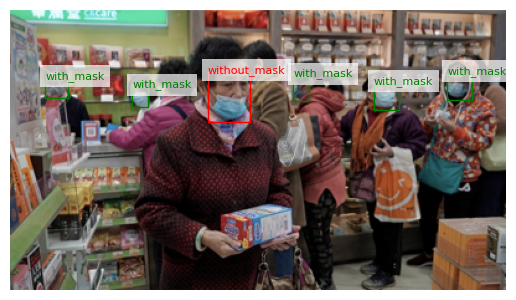

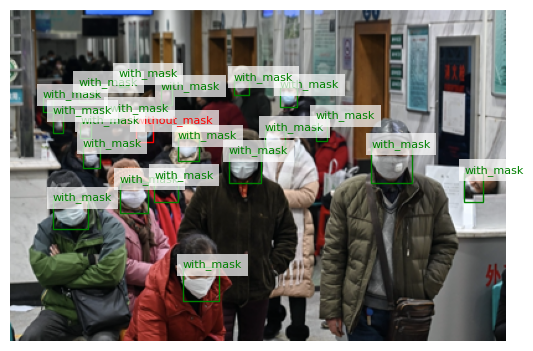

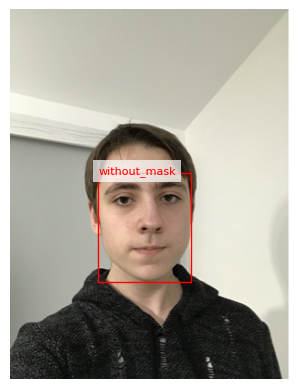

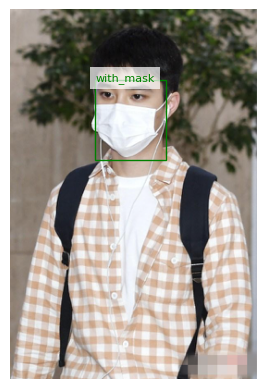

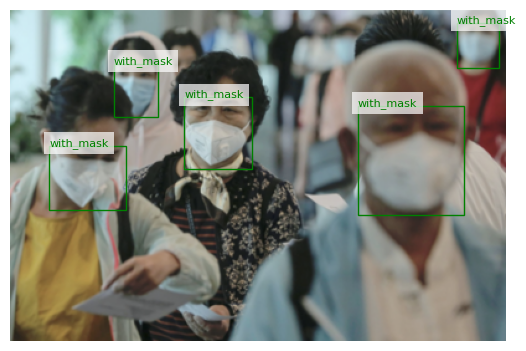

In [54]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches

path_annotations = "/kaggle/input/face-mask-detection/annotations/"
path_images = "/kaggle/input/face-mask-detection/images/"

def plot_images_with_labels(images_dir, annotations_dir, num_images=5):
    plotted_images = 0
    for filename in os.listdir(annotations_dir):
        if filename.endswith(".xml"):
            xml_path = os.path.join(annotations_dir, filename)
            image_filename = filename[:-4] + ".png"  # Assuming image files have .png extension
            image_path = os.path.join(images_dir, image_filename)

            # Load image
            image = plt.imread(image_path)
            fig, ax = plt.subplots(1)
            ax.imshow(image)
            ax.axis('off')

            # Parse XML annotation file
            tree = ET.parse(xml_path)
            root = tree.getroot()

            # Plot bounding boxes and labels
            for obj in root.findall('object'):
                label = obj.find('name').text

                # Treat 'mask_weared_incorrect' as 'without_mask'
                if label == 'mask_weared_incorrect':
                    label = 'without_mask'

                bbox = obj.find('bndbox')
                xmin = int(bbox.find('xmin').text)
                ymin = int(bbox.find('ymin').text)
                xmax = int(bbox.find('xmax').text)
                ymax = int(bbox.find('ymax').text)

                color = 'green' if label == 'with_mask' else 'red'
                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                          linewidth=1, edgecolor=color, facecolor='none')
                ax.add_patch(rect)
                ax.annotate(label, (xmin, ymin), color=color, fontsize=8,
                            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

            plt.show()

            plotted_images += 1
            if plotted_images >= num_images:
                break

# Example usage (plot only 5 images)
plot_images_with_labels(path_images, path_annotations, num_images=5)




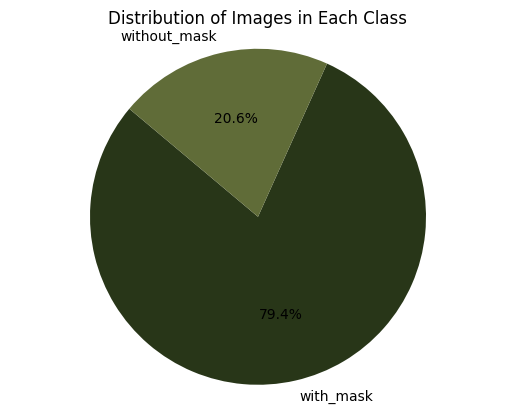

In [40]:
def plot_class_distribution(annotations_dir):
    class_counts = {'with_mask': 0, 'without_mask': 0}  # Initialize class counts
    
    # Count occurrences of each class
    for filename in os.listdir(annotations_dir):
        if filename.endswith(".xml"):
            xml_path = os.path.join(annotations_dir, filename)
            tree = ET.parse(xml_path)
            root = tree.getroot()
            
            for obj in root.findall('object'):
                label = obj.find('name').text
                # Treat 'mask_weared_incorrect' as 'without_mask'
                if label == 'mask_weared_incorrect':
                    label = 'without_mask'
                class_counts[label] += 1
    
    # Plot pie chart
    labels = list(class_counts.keys())
    sizes = list(class_counts.values())
    colors = ['#283618', '#606c38']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title('Distribution of Images in Each Class')
    plt.show()

# Example usage
plot_class_distribution(path_annotations)


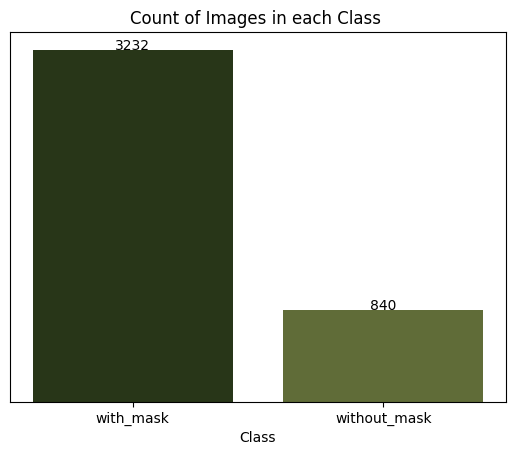

In [49]:
def plot_class_distribution_bar(annotations_dir):
    class_counts = {'with_mask': 0, 'without_mask': 0}  # Initialize class counts
    
    # Count occurrences of each class
    for filename in os.listdir(annotations_dir):
        if filename.endswith(".xml"):
            xml_path = os.path.join(annotations_dir, filename)
            tree = ET.parse(xml_path)
            root = tree.getroot()
            
            for obj in root.findall('object'):
                label = obj.find('name').text
                # Treat 'mask_weared_incorrect' as 'without_mask'
                if label == 'mask_weared_incorrect':
                    label = 'without_mask'
                class_counts[label] += 1
    
    # Plot bar chart
    labels = list(class_counts.keys())
    sizes = list(class_counts.values())
    colors = ['#283618', '#606c38']
    plt.bar(labels, sizes, color=colors)
    plt.xlabel('Class')
    plt.title('Count of Images in each Class ')
    
    # Add numbers on top of the bars
    for i, v in enumerate(sizes):
        plt.text(i, v + 0.1, str(v), ha='center')
    
    # Remove y-axis label
    plt.gca().axes.get_yaxis().set_visible(False)
    
    plt.show()

# Example usage
plot_class_distribution_bar(path_annotations)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d4a373;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Note: The data has 3 classes : with_mask, without_mask, and mask_weared_incorrect, but we decided to go with only 2 classes and combine without_mask and mask_weared_incorrect 
                </p> </div>